<a href="https://colab.research.google.com/github/AbeerAlghamdi1/SDA_Data_Science_Final_Project/blob/main/Employee_Turnover_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####**Import libraries:**


In [530]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

####**Reading Data:**

In [531]:
df = pd.read_csv("https://github.com/AbeerAlghamdi1/Dataset/raw/main/Employee_Turnover_Prediction.csv")

# Showing the first 5 rows of data:

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## **EDA:**

### **Data preprocessing**

In [532]:
# Rename columns:

df = df.rename(columns={'satisfaction_level': 'SatisfactionRate', 
                        'last_evaluation': 'Evaluation',
                        'number_project': 'ProjectCount',
                        'average_montly_hours': 'MonthlyHoursAverage',
                        'time_spend_company': 'YearsAtCompany',
                        'Work_accident': 'WorkAccident',
                        'left': 'TurnedOver',
                        'promotion_last_5years': 'Promotion',
                        'sales' : 'Department',
                        'salary': 'Salary'  
                        })

##### **Target Feature**

The **'TurnedOver'** feature is the **Target** feature. **' 1 '** for employees who turned over ,and **' 0 '** for those who didn't turned over.

In [533]:
# Showing 5 samples of data:

df.sample(5)

,SatisfactionRate,Evaluation,ProjectCount,MonthlyHoursAverage,YearsAtCompany,WorkAccident,TurnedOver,Promotion,Department,Salary
10764,0.94,0.52,4,217,6,1,0,0,support,low
5302,0.92,0.78,3,218,3,0,0,0,technical,low
3769,0.56,0.56,4,195,2,0,0,0,hr,medium
3407,0.54,0.43,3,192,2,0,0,0,support,low
5342,0.28,0.90,4,275,6,0,0,0,marketing,low


In [534]:
# Showing the number of rows and columns in data:

df.shape

(14999, 10)

In [535]:
# Description of data:

df.describe()

,SatisfactionRate,Evaluation,ProjectCount,MonthlyHoursAverage,YearsAtCompany,WorkAccident,TurnedOver,Promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [536]:
# Catgorical column describtion 
df.describe(exclude=[np.number])

,Department,Salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [537]:
# Data information:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SatisfactionRate     14999 non-null  float64
 1   Evaluation           14999 non-null  float64
 2   ProjectCount         14999 non-null  int64  
 3   MonthlyHoursAverage  14999 non-null  int64  
 4   YearsAtCompany       14999 non-null  int64  
 5   WorkAccident         14999 non-null  int64  
 6   TurnedOver           14999 non-null  int64  
 7   Promotion            14999 non-null  int64  
 8   Department           14999 non-null  object 
 9   Salary               14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [538]:
# Showing missing data:

df.isnull().sum()

SatisfactionRate       0
Evaluation             0
ProjectCount           0
MonthlyHoursAverage    0
YearsAtCompany         0
WorkAccident           0
TurnedOver             0
Promotion              0
Department             0
Salary                 0
dtype: int64

In [539]:
# Calculate duplicate values:
df.duplicated().sum()

3008

In [540]:
# Remove duplicate values:
df.drop_duplicates(inplace=True)

In [541]:
# Calculate duplicate values:
df.duplicated().sum()

0

In [542]:
df.shape

(11991, 10)

In [543]:
# Looks like about 83% of employees stayed and 17% of employees Turned over. 

turnover_rate = df.TurnedOver.value_counts() / 11991
turnover_rate

0    0.833959
1    0.166041
Name: TurnedOver, dtype: float64

In [544]:
# Overview of summary ( Not-TurnedOver V.S. TurnedOver)

turnover_Summary = df.groupby('TurnedOver')
turnover_Summary.mean()

,SatisfactionRate,Evaluation,ProjectCount,MonthlyHoursAverage,YearsAtCompany,WorkAccident,Promotion
TurnedOver,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


### **Visualization** 

##### Overview Of Turnover Rate:

In [545]:
labels = ['Not TurnedOver', 'TurnedOver']
values = df.TurnedOver.value_counts()
colors = [ '#fc7c74','#a4ac9c']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[ 0.1, 0])])
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker=dict(colors=colors, line=dict(color='#000000', width=.6)))
fig.update_layout(
    title_text="Overview Of Turnover Rate",
    autosize=False,
    width=500,
    height=450)

fig.show(renderer="colab")

In [546]:
# Function to assign legend title items names:

def trace_name(trace):
  for trace in fig.data:
   if trace.name == 'TurnedOver=0':
      trace.name = 'Not TurnedOver'
   else:
      trace.name = 'TurnedOver'

##### Employees Salaries By Turnover

In [547]:
fig=px.histogram(df, x="Salary", color="TurnedOver", barmode='group',
             title="Employees Salaries By Turnover", width=650, height=400,
             template="simple_white",color_discrete_sequence=px.colors.qualitative.Bold_r)

fig.update_traces(trace_name(trace),marker=dict(line=dict(color='#000000', width=.6)))
fig.update_layout(legend_traceorder="reversed")
fig.show(renderer="colab")

#####Employees Satisfaction Rate By Turnover

In [548]:
fig=px.histogram(df, x="SatisfactionRate", color="TurnedOver", barmode='overlay',
             title="Employees Satisfaction Rate By Turnover", width=650, height=400,
             template="simple_white",color_discrete_sequence=px.colors.qualitative.Bold_r)

fig.update_traces(trace_name(trace),marker=dict(line=dict(color='#000000', width=.6)))      
fig.update_layout(legend_traceorder="reversed")
fig.show(renderer="colab")

##### Employees Evaluation By Turnover

In [549]:
fig=px.histogram(df, x="Evaluation", color="TurnedOver", barmode='overlay',
             title=" Employees Evaluation By Turnover", width=650, height=400,
             template="simple_white",color_discrete_sequence=px.colors.qualitative.Bold_r)

fig.update_traces(trace_name(trace),marker=dict(line=dict(color='#000000', width=.6)))      
fig.update_layout(legend_traceorder="reversed")
fig.show(renderer="colab")

##### Employees Projects Count By Turnover

In [550]:
fig=px.histogram(df, x="ProjectCount", color="TurnedOver", barmode='group',
             title="Employees Projects Count By Turnover", width=650, height=400,
             template="simple_white",color_discrete_sequence=px.colors.qualitative.Bold_r)

fig.update_traces(trace_name(trace),marker=dict(line=dict(color='#000000', width=.6)))     
fig.update_layout(legend_traceorder="reversed")
fig.show(renderer="colab")

##### Employees Average Monthly Hours By Turnover

In [551]:
fig=px.histogram(df, x="MonthlyHoursAverage", color="TurnedOver", barmode='stack',
             title="Employees Average Monthly Hours By Turnover", width=650, height=400,
             template="simple_white",color_discrete_sequence=px.colors.qualitative.Bold_r)

fig.update_traces(trace_name(trace),marker=dict(line=dict(color='#000000', width=.6)))
fig.update_layout(legend_traceorder="reversed")
fig.show(renderer="colab")

#####Years Employees Spent At Company By Turnover

In [552]:
fig=px.histogram(df, x="YearsAtCompany", color="TurnedOver", barmode='group',
             title="Years Employees Spent At Company By Turnover", width=650, height=400,
             template="simple_white",color_discrete_sequence=px.colors.qualitative.Bold_r)

fig.update_traces(trace_name(trace),marker=dict(line=dict(color='#000000', width=.6)))
fig.update_layout(legend_traceorder="reversed")
fig.show(renderer="colab")

##### Employees Work Accidents By Turneover

In [553]:
fig=px.histogram(df, x="WorkAccident", color="TurnedOver", barmode='group',
             title="Employees Work Accidents By Turneover ", width=650, height=400,
             template="simple_white",color_discrete_sequence=px.colors.qualitative.Bold_r)

fig.update_traces(trace_name(trace),marker=dict(line=dict(color='#000000', width=.6)))
fig.update_layout(legend_traceorder="reversed")
fig.show(renderer="colab")

##### Employees Departments By Turnover

In [554]:
fig=px.histogram(df, x="Department", color="TurnedOver", barmode='group',
             title=" Employees Departments By Turnover", width=650, height=400,
             template="simple_white",color_discrete_sequence=px.colors.qualitative.Bold_r)

fig.update_traces(trace_name(trace),marker=dict(line=dict(color='#000000', width=.6)))
fig.update_layout(legend_traceorder="reversed")
fig.show(renderer="colab")

##### Employees Promotions By Turnover

In [529]:
fig=px.histogram(df, x="Promotion", color="TurnedOver", barmode='group',
             title="Employees Promotions By Turnover", width=650, height=400,
             template="simple_white",color_discrete_sequence=px.colors.qualitative.Bold_r)

fig.update_traces(trace_name(trace),marker=dict(line=dict(color='#000000', width=.6)))      
fig.update_layout(legend_traceorder="reversed")
fig.show(renderer="colab")

In [511]:
corr = df.corr()
corr.style.background_gradient(cmap='Reds')

,SatisfactionRate,Evaluation,ProjectCount,MonthlyHoursAverage,YearsAtCompany,WorkAccident,TurnedOver,Promotion
SatisfactionRate,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
Evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
ProjectCount,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
MonthlyHoursAverage,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
YearsAtCompany,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
WorkAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
TurnedOver,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
Promotion,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


In [ ]:
# sns.pairplot(data= df, hue='TurnedOver')

In [ ]:
# df.hist(bins=15, figsize=(13,13), color='b', alpha=0.6);

### **Data Preparation**

##### 1.Convert Categorical Data 

In [ ]:
# Convert Categorical Variable Into Dummy Variables

df= pd.get_dummies(df, columns=['Department','Salary' ])

#### 2.Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Select split parameter:
X = df.drop(['TurnedOver'], axis=1)
y = df.TurnedOver

In [ ]:
# Splitting into train and test sets for both parameters
X_train, X_test ,y_train , y_test = train_test_split(X,y, train_size=0.75, random_state= 42)

## **Modeling:**

#### 1.Baseline Model

In [ ]:
def baseline_model(n_predictions, value_to_predict):

# list to save all the predicted values in
 baseline_preds = []
 for i in range(n_predictions): # loop through training set size
  baseline_preds.append(value_to_predict) # predict the most common values for each row and store it in the list
 return pd.Series(baseline_preds) # return the predictions list as series

In [ ]:
# number of predictions:
n_predictions = len(y_test)
n_predictions

In [ ]:
# Which most common class:
y_train.value_counts()

In [ ]:
# Which value to predict: (classification = most common class (0 = Not TurnedOver)
baseline_value = y_train.value_counts().index[0] 
baseline_value 

In [ ]:
# Print all predicted values
baseline_preds = baseline_model(n_predictions, baseline_value)
baseline_preds 

##### Baseline - Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

acc_base = accuracy_score(y_test , baseline_preds)
acc_base

##### Baseline - Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, baseline_preds))

##### Baseline - Confusion Matrix

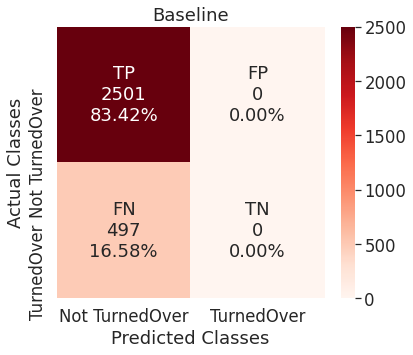

In [513]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, baseline_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Not TurnedOver', 'TurnedOver']

plt.figure(figsize=(6,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Reds' , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Baseline")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

#### 2.Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
lr_preds = lr.predict(X_test)
lr_preds

##### LR - Accuracy

In [ ]:
acc_lr = accuracy_score(y_test , lr_preds)
acc_lr

##### LR - Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr_preds))

##### LR - Confusion Matrix

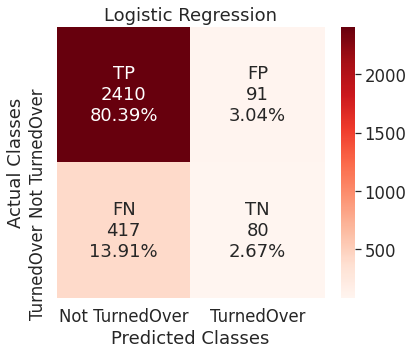

In [514]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, lr_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Not TurnedOver', 'TurnedOver']

plt.figure(figsize=(6,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Reds' , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Logistic Regression")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

#### 3.KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

In [ ]:
knn_preds = knn.predict(X_test)
knn_preds

##### KNN - Accuracy

In [ ]:
knn_acc = accuracy_score(y_test, knn_preds)
knn_acc

##### KNN - Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knn_preds))

##### KNN - Confusion Matrix

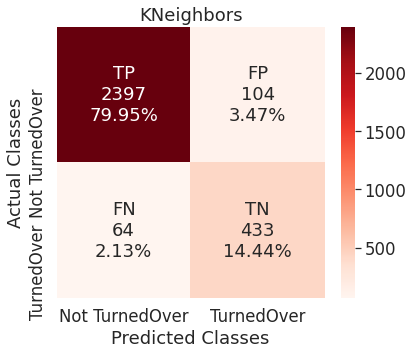

In [515]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, knn_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Not TurnedOver', 'TurnedOver']

plt.figure(figsize=(6,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Reds' , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("KNeighbors")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

#### 4.Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

In [ ]:
rf_preds= rf.predict(X_test)
rf_preds

##### RF - Accuracy

In [ ]:
acc_rf = accuracy_score(y_test , rf_preds)
acc_rf

##### RF - Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_preds))

##### RF - Confusion Matrix

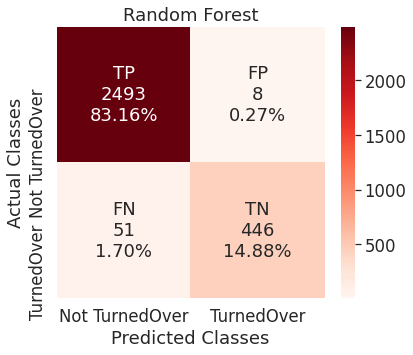

In [517]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, rf_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Not TurnedOver', 'TurnedOver']

plt.figure(figsize=(6,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Reds' , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Random Forest")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

#### 5.Support Vector Machine (SVM):

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

In [ ]:
svc_preds = svc.predict(X_test)
svc_preds

##### SVC - Accuracy

In [ ]:
acc_svc = accuracy_score(y_test , svc_preds)
acc_svc

##### SVC - Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svc_preds))

##### SVC - Confusion Matrix

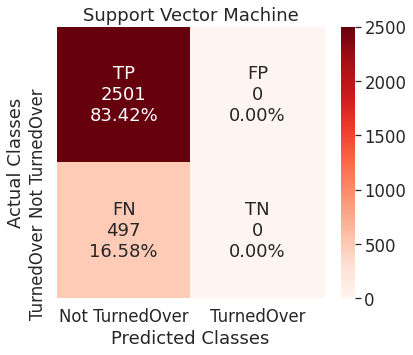

In [518]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, svc_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Not TurnedOver', 'TurnedOver']

plt.figure(figsize=(6,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Reds' , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Support Vector Machine")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

## **Model Tuning**

#### Build Random Forest Model with hyperparameters

In [ ]:
# Create the param grid
param_grid = { 
    'n_estimators': [200,300,500],
    'max_features': [.3, .5],
    'max_depth' : [7,10],
    'bootstrap': [False, True]
}

#### Random Forest - GridSearchCV

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 10)

In [ ]:
# grid_result = grid.fit(X_train, y_train)

In [ ]:
#grid_result.best_params_

In [ ]:
rf_grid = RandomForestClassifier(bootstrap = False, max_depth = 10, max_features = .5, n_estimators = 200)
rf_grid.fit(X_train, y_train)

In [ ]:
rf_grid_preds= rf_grid.predict(X_test)
rf_grid_preds

##### RF_Grid - Accuracy

In [ ]:
acc_rf_grid = accuracy_score(y_test , rf_grid_preds)
acc_rf_grid

##### RF_Grid - Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_grid_preds))

##### RF_Grid - Confusion Matrix

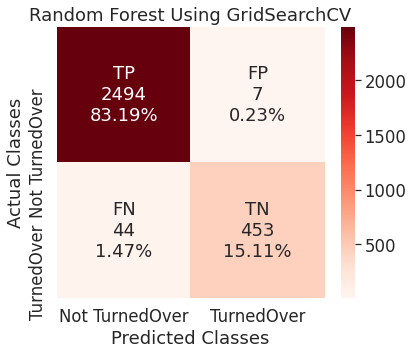

In [519]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, rf_grid_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Not TurnedOver', 'TurnedOver']

plt.figure(figsize=(6,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Reds' , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Random Forest Using GridSearchCV")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

#### Random Forest - RandomizedSearchCV

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
Randomize = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [ ]:
# search = Randomize.fit(X_train, y_train)

In [ ]:
#search.best_params_

In [ ]:
rf_Randomize = RandomForestClassifier(bootstrap = False, max_depth = 10, max_features = .5, n_estimators = 200)
rf_Randomize.fit(X_train, y_train)

In [ ]:
rf_rand_preds= rf_Randomize.predict(X_test)
rf_rand_preds

##### RF_Randomize - Accuracy

In [ ]:
acc_rf_rand = accuracy_score(y_test , rf_rand_preds)
acc_rf_rand

##### RF_Randomize - Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_rand_preds))

##### RF_Randomize - Confusion Matrix

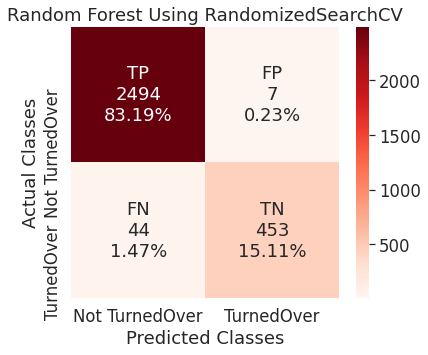

In [520]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, rf_rand_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Not TurnedOver', 'TurnedOver']

plt.figure(figsize=(6,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Reds' , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Random Forest Using RandomizedSearchCV")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

## **Compare Results**

In [ ]:
# Save each Accuracy with its model name in a data frame

accuracies = pd.DataFrame()
accuracies['names'] = ['Baseline','Logistic' , 'KNN' ,'SVC','Random Forest','RF_Grid','RF_Randomize']
accuracies['values'] = [acc_base , acc_lr , knn_acc , acc_svc , acc_rf, acc_rf_grid , acc_rf_rand]

In [566]:
# Visualize accuracies results:

fig = px.bar(accuracies, x="names", y="values",color='names',width=650, height=400,
             hover_name=['Baseline','Logistic' , 'KNN' ,'SVC','Random Forest','RF_Grid','RF_Randomize'],
             template="simple_white",color_discrete_sequence=px.colors.qualitative.Bold_r,
             title="Comparing Models Accuracy")
for trace in fig.data:
    trace.name = trace.name.split('=')[1]

fig.update_traces(marker=dict(line=dict(color='#000000', width=.6)))
fig.update_xaxes(title_text='Model Name')
fig.update_yaxes(title_text='Accuracy Result')
fig.show(renderer="colab")

### Roc

# **Conclusion:**